In [41]:
library(tidyverse)
library(WGCNA)
library(ggraph)
library(igraph)
library(pheatmap)
library(RColorBrewer)

# Custom package
library(rutils)

In [42]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [43]:
dset_idx <- 3
sig_thresh <- 0.05
hub_con_thresh <- 0.5
max_tom <- 0.25

In [44]:
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_data.RData"))
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_network.RData"))
network_mm_gs_df <- read_tsv(paste0(dirs$analysis_dir, "/network/", unified_dsets[dset_idx], "_gene_mm_gs.tsv"))
network_me_sig_df <- read_tsv(paste0(dirs$analysis_dir, "/network/", unified_dsets[dset_idx], "_eigengene_traits.tsv"))


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_double(),
  geneID = col_character(),
  module = col_character()
)
i Use `spec()` for the full column specifications.



-- Column specification ------------------------------------------------------------------------------------------------
cols(
  module = col_character(),
  figo_stage_1_cor = col_double(),
  figo_stage_2_cor = col_double(),
  figo_stage_3_cor = col_double(),
  figo_stage_4_cor = col_double(),
  figo_stage_1_pval = col_double(),
  figo_stage_2_pval = col_double(),
  figo_stage_3_pval = col_double(),
  figo_stage_4_pval = col_double(),
  figo_stage_1_qval = col_double(),
  figo_stage_2_qval = col_double(),
  figo_stage_3_qval = col_double(),
  figo_stage_4_qval = col_double(),
  vital_hr = col_double(),
  vital_dev_cor = col_double(),
  vital_pval = col_double(),
  vital_qval = col_double()
)




In [45]:
pseudo_hub_genes <- read_lines(paste0(dirs$analysis_dir, "/gene_lists/", unified_dsets[dset_idx], "_figo_network_hub_thresh_", hub_con_thresh, "_gene_list.txt"))

In [46]:
mini_adj <- WGCNA::adjacency(data_expr[, pseudo_hub_genes], power = soft_power, type = "unsigned")
# mini_adj <- WGCNA::adjacency(data_expr[, pseudo_hub_genes], type = "unsigned")
mini_tom <- WGCNA::TOMsimilarity(mini_adj)
colnames(mini_tom) <- colnames(mini_adj)
rownames(mini_tom) <- rownames(mini_adj)

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [47]:
mini_tom_zero_diag <- mini_tom
diag(mini_tom_zero_diag) <- 0
mini_tom_zero_diag[mini_tom_zero_diag > max_tom] = max_tom

In [48]:
break_list <- seq(0, 0.25, by = 0.01)
pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))

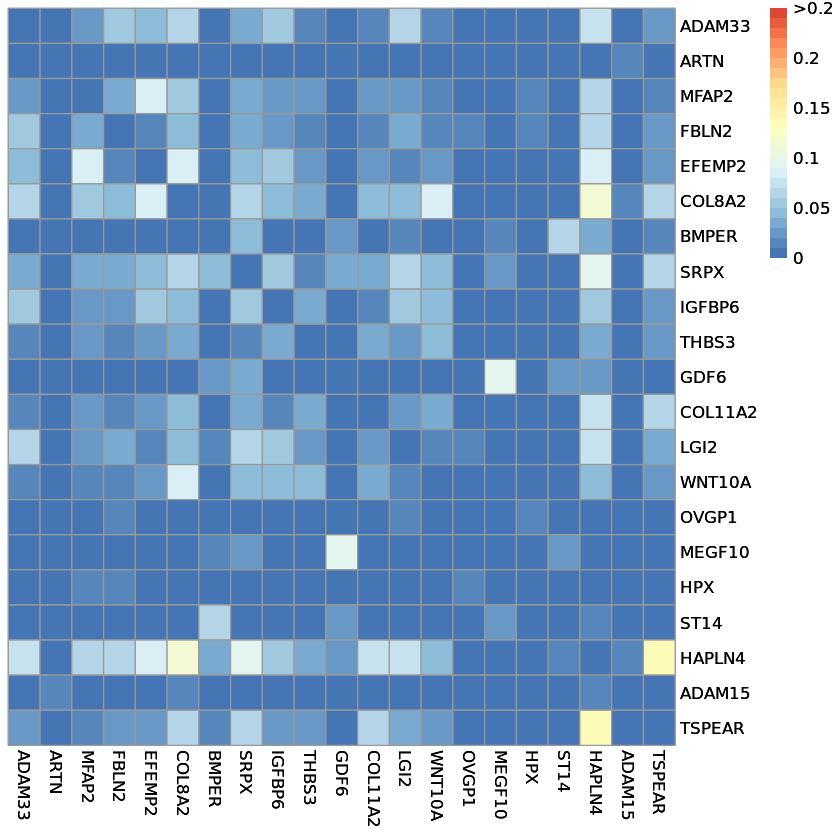

In [49]:
# heatmap(mini_tom_zero_diag[tom_weak_mask, tom_weak_mask], Rowv = NA, Colv = NA, scale = "none")
# TOM mask
hm <- pheatmap(mini_tom_zero_diag, cluster_rows = FALSE, cluster_cols = FALSE, legend_breaks = c(0, 0.05, 0.1, 0.15, 0.2, 0.25), legend_labels = c("0", "0.05", "0.1", "0.15", "0.2", ">0.2"), drop_levels = FALSE, color = pal, breaks = break_list)
hm
# # Adj mask
# pheatmap(mini_adj_zero_diag[tom_weak_mask, tom_weak_mask], cluster_rows = F, cluster_cols = F)

In [50]:
ggsave(paste0(dirs$figures_dir, "/network/", unified_dsets[dset_idx], "_pseudo_hub_genes_TOM.png"), hm)

Saving 6.67 x 6.67 in image

